In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Folder and Data file

In [2]:
root_folder = "/content/drive/MyDrive/ABSA work/codes/bard/results/"

In [3]:
import os

def list_files_in_subfolders(root_folder):
    file_list = []
    for root, _, files in os.walk(root_folder):
        for file in files:
            # Get the file name without extension
            if file.lower().endswith('.csv'):
                file_name = os.path.splitext(file)[0]
                # csv_file_list.append(file_name)
                file_list.append(file_name)
    return file_list

# Function for Reports

##String to List


In [4]:
import ast
import re
def convert_string_to_list(input_string):
#Preprocess string
  # input_string=input_string.lower()
  input_string = input_string.replace('mixed', 'neutral')
  input_string = input_string.replace('okay', 'neutral')
  input_string = input_string.replace('average', 'neutral')
  input_string = input_string.replace(":", "")
  input_string = input_string.replace("-", "")

  #To remove all extra words
  pattern = r'\b(?!positive|negative|neutral|not available)\w+\b'
  input_string = re.sub(pattern, '', input_string, flags=re.IGNORECASE)


  #To remove wide epaces
  input_String=''.join(input_string.split())
  # print(input_string)

  try:
    if '[' in input_string:
      # print(set(ast.literal_eval(input_string)))
      # print(ast.literal_eval(input_string))
      return ast.literal_eval(input_string)
    else:
      required_output = [word.strip() for word in input_string.split(',')]
      # print(required_output)
      return required_output
  except:
        word_list = re.findall(r'\w+', input_string)

        # Add single quotes around each word and join them back
        converted_string = '[' + ', '.join([f"'{word}'" for word in word_list]) + ']'

        # converted_string = ', '.join([f"'{word}'" for word in word_list])
        # print(converted_string)
        # print(ast.literal_eval(converted_string))
        return ast.literal_eval(converted_string)


In [5]:
# # Apply lowercase to 'Polarity' column
# df['Sentiment'] = df['Sentiment'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# df['deberta'] = df['deberta'].apply(lambda x: x.lower() if isinstance(x, str) else x)
# # Apply string conversion to 'Polarity' column
# df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
# df['deberta'] = df['deberta'].apply(convert_string_to_list)

In [6]:
if (type(["HEllo"]) is list):
  print("hello")

hello


## Accuracy function

In [7]:
import re
# Function to calculate accuracy between "sentiment" and "deberta" lists
def calculate_accuracy(sentiments, predicted_sentiments):
    correct_predictions = 0.0
    total_predictions = 0.0
    predictions_list=[]
    sentiments_list=[]
    for sentiment, predicted_sentiment in zip(sentiments, predicted_sentiments):
        # print(type(sentiment), type(deberta_sentiment))
        total_predictions += len(sentiment)
        # print(sentiment, predicted_sentiment)
        for s, d in zip(sentiment, predicted_sentiment):
            cleaned_string = re.sub(r'[^\w\s]', '', d)
            # Print the cleaned string
            # print(s, cleaned_string)
            sentiments_list.append(s)
            predictions_list.append(cleaned_string)
            # print(s,"      ", d)
            if s == d:
                correct_predictions += 1
            # else:
            #     # print(sentiment, predicted_sentiment)
    print(total_predictions)
    accuracy = correct_predictions / total_predictions
    return accuracy, sentiments_list, predictions_list


In [8]:
import re
# Function to calculate accuracy between "sentiment" and "deberta" lists
def calculate_accuracy_single(sentiments, predicted_sentiments):
    correct_predictions = 0.0
    total_predictions = 0.0
    predictions_list=[]
    sentiments_list=[]
    for s, d in zip(sentiments, predicted_sentiments):
        total_predictions += 1
        cleaned_string = re.sub(r'[^\w\s]', '', d)
        # print(s, cleaned_string)
        sentiments_list.append(s)
        predictions_list.append(cleaned_string)
        # print(s,"      ", d)
        if s == d:
            correct_predictions += 1
        # else:
        #    print(sentiment, predicted_sentiment)

    accuracy = correct_predictions / total_predictions
    return accuracy, sentiments_list, predictions_list


## Classificaiton Report

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate classification report which includes precision, recall, and f1-score per class
def save_report(actual_labels, predicted_labels, filename, title):
  class_report = classification_report(actual_labels, predicted_labels)

  print("\nClassification Report:")
  print(class_report)
  with open(filename+'_classification_report' + '.txt', 'w') as f:
      f.write(class_report)
  print("Classification report saved to 'classification_report_" + title + ".txt'")

## Confusion matrix

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
def plot_confusion_matrix(actual_labels, predicted_labels, filename, title):

  # actual_labels = ['neutral' if  'not available' in x.lower() or 'mixed' in x.lower() or 'okay' in x.lower() or 's' in x.lower() else x for x in actual_labels]
  # predicted_labels = ['neutral' if  'not available' in x.lower() or 'mixed' in x.lower() or 'okay' in x.lower() or 's' in x.lower() else x for x in predicted_labels]
  # Get unique class labels
  class_labels = list(set(actual_labels+predicted_labels))
  print(class_labels)
  # Create confusion matrix
  conf_matrix = confusion_matrix(actual_labels, predicted_labels, labels=class_labels)

  # Plot the confusion matrix using Seaborn
  plt.figure(figsize=(6, 5))
  sns.set(font_scale=1.0)
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
              xticklabels=class_labels, yticklabels=class_labels, cbar=True)
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title(f"Confusion Matrix for {title}")
  plt.tight_layout()
  plt.savefig(filename+".png")
  plt.show()


## Save results in CSV

In [11]:
def save_results( all_true_labels, all_predicted_labels, folder_name, data, title, test_acc, task="ATSA"):
  # Calculate precision, recall, and F-score
    precision = precision_score(all_true_labels, all_predicted_labels, average='weighted')
    recall = recall_score(all_true_labels, all_predicted_labels, average='weighted')
    f_score = f1_score(all_true_labels, all_predicted_labels, average='weighted')
    if 'acsa' in title or 'category' in title or 'sentihood' in title.lower():
      task='ACSA'
    data_to_append = {
        'dataset_name': data+title,
        'task':task,
        'test_accuracy': round(test_acc, 2),
        'f_score': round(f_score, 2),
        'recall': round(recall,2),
        'precision': round(precision,2)
    }

    csv_file = folder_name+"Results.csv"  # Replace with your CSV file name

    try:
        df = pd.read_csv(csv_file)
    except FileNotFoundError:
        df = pd.DataFrame(columns=['dataset_name', 'task', 'test_accuracy', 'f_score', 'precision', 'recall'])

    df = df.append(data_to_append, ignore_index=True)
    df.to_csv(csv_file, index=False)


# DOTSA Dataset

In [12]:
data = "dotsa/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
list_files


['new_Restaurant_test_bard',
 'new_Books_test_bard',
 'new_Hotels_test_bard',
 'new_Clothing_test_bard']

In [13]:
filename = data_folder+list_files[0]
csv_file = filename+".csv"
import pandas as pd
df = pd.read_csv(csv_file)
print(len(df))
df.head(5)


141


,Text,Aspect,Sentiment,Domain,Response_bard,sentiment_bard
0,"Great place for lunch , delicious and simple ....","place, place--Combo wrap","Positive, Mixed",Restaurant,"sentiment: ['positive', 'positive']","['positive', 'positive']"
1,Best pint of Guinness in town . Staff are frie...,"Irish bar--Irish bar, Irish bar--Staff, Irish ...","Positive, Positive, Positive",Restaurant,"sentiment: ['positive', 'positive', 'positive']","['positive', 'positive', 'positive']"
2,These guys were recommended to me by a co-work...,owner,Positive,Restaurant,sentiment: ['positive'],['positive']
3,Ah the things you can do with pork belly . App...,"beer, service, pork belly","Positive, Positive, Positive",Restaurant,"sentiment: ['positive', 'positive', 'positive']","['positive', 'positive', 'positive']"
4,So going into the establishment I had extremel...,"restaurant--cash only, restaurant--pizza--sauc...","Negative, Negative, Positive, Positive, Mixed,...",Restaurant,"sentiment: ['negative', 'negative', 'positive'...","['negative', 'negative', 'positive', 'positive..."


In [14]:
# Check for null values in any column of each row
rows_with_null = df[df.isnull().any(axis=1)]
print(len(rows_with_null))
# rows_with_null

6


## Call Accuracy and report in loop

Null values are:  0 in  new_Restaurant_test_bard
Number of Neutral instances In Original  60
<class 'str'>
641.0
Number of Neutral instances In Original  58
Number of Neutral instances In Predicted  3
Unique values in Actual {'neutral', 'positive', 'negative'}
Unique values in Predicted {'neutral', 'positive', 'negative'}

Classification Report:
              precision    recall  f1-score   support

    negative       0.66      0.85      0.74       101
     neutral       0.67      0.03      0.07        58
    positive       0.90      0.95      0.93       465

    accuracy                           0.85       624
   macro avg       0.74      0.61      0.58       624
weighted avg       0.84      0.85      0.82       624

Classification report saved to 'classification_report_Restaurant_test_bard.txt'
['neutral', 'positive', 'negative']


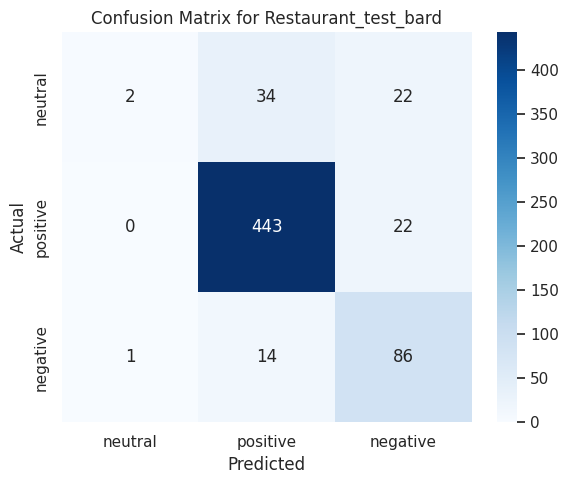

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Books_test_bard
Number of Neutral instances In Original  43
<class 'str'>
327.0
Number of Neutral instances In Original  43
Number of Neutral instances In Predicted  1
Unique values in Actual {'neutral', 'positive', 'negative'}
Unique values in Predicted {'neutral', 'positive', 'negative'}

Classification Report:
              precision    recall  f1-score   support

    negative       0.68      0.78      0.73        55
     neutral       0.00      0.00      0.00        43
    positive       0.84      0.96      0.90       224

    accuracy                           0.80       322
   macro avg       0.51      0.58      0.54       322
weighted avg       0.70      0.80      0.75       322

Classification report saved to 'classification_report_Books_test_bard.txt'
['neutral', 'positive', 'negative']


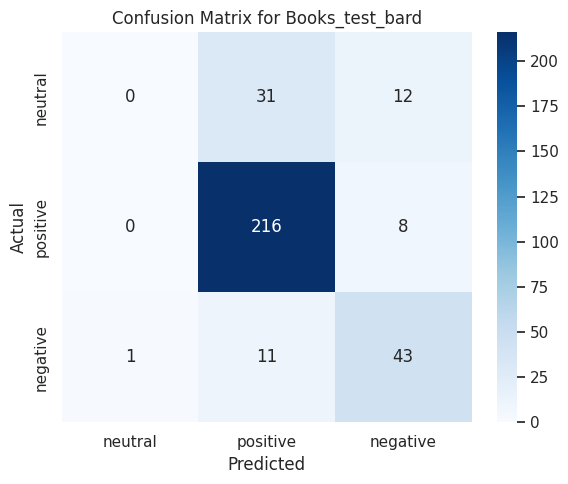

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Hotels_test_bard
Number of Neutral instances In Original  23
<class 'str'>
549.0
Number of Neutral instances In Original  23
Number of Neutral instances In Predicted  0
Unique values in Actual {'neutral', 'positive', 'negative'}
Unique values in Predicted {'positive', 'negative'}

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.89      0.81        36
     neutral       0.00      0.00      0.00        23
    positive       0.95      0.99      0.97       486

    accuracy                           0.94       545
   macro avg       0.57      0.62      0.59       545
weighted avg       0.90      0.94      0.92       545



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_Hotels_test_bard.txt'
['neutral', 'positive', 'negative']


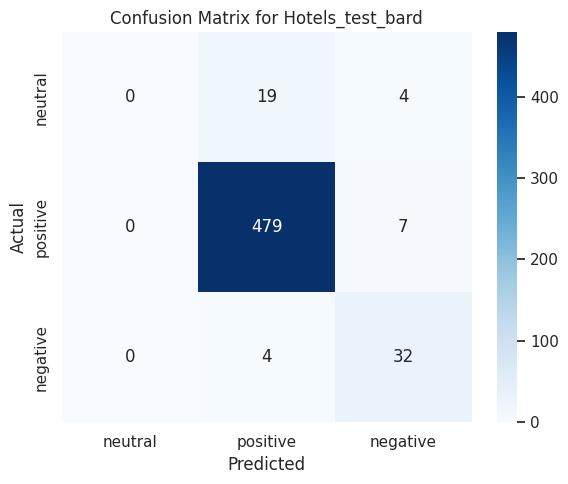

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  new_Clothing_test_bard
Number of Neutral instances In Original  36
<class 'str'>
196.0
Number of Neutral instances In Original  36
Number of Neutral instances In Predicted  0
Unique values in Actual {'neutral', 'positive', 'negative'}
Unique values in Predicted {'positive', 'negative'}

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.87      0.80        39
     neutral       0.00      0.00      0.00        36
    positive       0.79      0.98      0.87       121

    accuracy                           0.78       196
   macro avg       0.51      0.62      0.56       196
weighted avg       0.63      0.78      0.70       196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_Clothing_test_bard.txt'
['neutral', 'positive', 'negative']


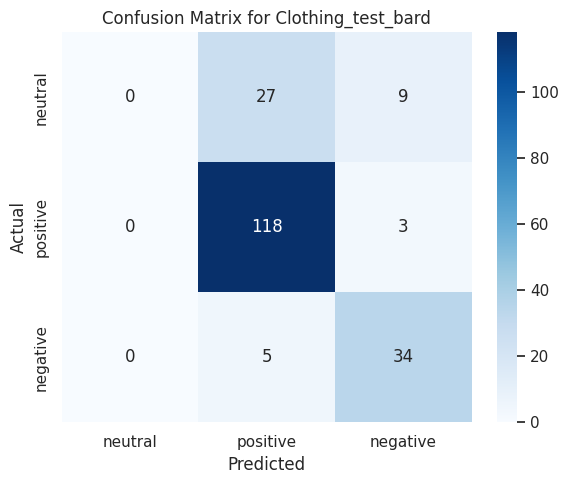

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [15]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  df.dropna(subset=['sentiment_bard'], inplace=True)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_bard'] = df['sentiment_bard'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  counts = df['Sentiment'].str.count('mixed', flags=re.IGNORECASE).sum()
  print("Number of Neutral instances In Original ", counts)
  # Apply string conversion to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
  print(type(df['sentiment_bard'][0]))
  df['sentiment_bard'] = df['sentiment_bard'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy(df["Sentiment"], df["sentiment_bard"])

  print("Number of Neutral instances In Original ",  actual_labels.count("neutral"))
  print("Number of Neutral instances In Predicted ",  predicted_labels.count("neutral"))
  print("Unique values in Actual", set(actual_labels))
  print("Unique values in Predicted", set(predicted_labels))

  save_report(actual_labels, predicted_labels, filename, list_files[i][4:])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i][4:])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i][4:], test_acc=accuracy )

# MAMS Dataset

In [16]:
data = "MAMS/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['ATSA_test_bard', 'ACSA_test_bard']

In [17]:
filename = data_folder+list_files[0]
csv_file = filename+".csv"
df = pd.read_csv(csv_file)
df.dropna(subset='sentiment_bard', inplace=True)
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,sentence,aspect_terms,polarity,Response_bard,sentiment_bard


Null values are:  0 in  ATSA_test_bard
Number of Neutral instances In Original  595
<class 'list'>
1309.0
Accuracy: 0.48663101604278075 for ATSA_test_bard

Classification Report:
              precision    recall  f1-score   support

    negative       0.51      0.86      0.64       327
     neutral       0.60      0.01      0.02       595
    positive       0.47      0.91      0.62       387

    accuracy                           0.49      1309
   macro avg       0.53      0.59      0.43      1309
weighted avg       0.54      0.49      0.35      1309

Classification report saved to 'classification_report_ATSA_test_bard.txt'
['neutral', 'positive', 'negative']


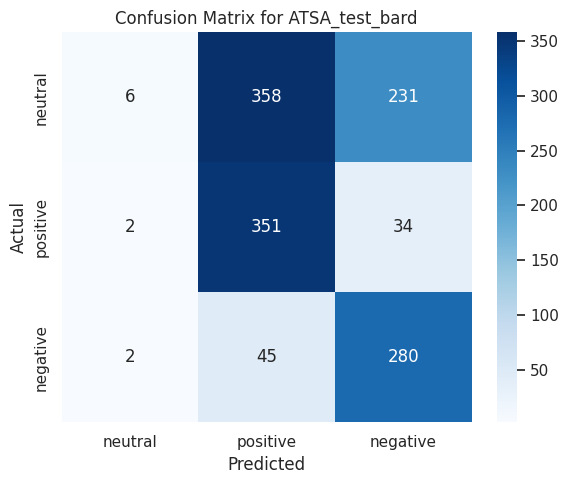

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  ACSA_test_bard
Number of Neutral instances In Original  387
<class 'list'>
887.0
Accuracy: 0.5580608793686584 for ACSA_test_bard

Classification Report:
              precision    recall  f1-score   support

    negative       0.55      0.86      0.67       259
     neutral       0.90      0.15      0.25       387
    positive       0.51      0.90      0.65       241

    accuracy                           0.56       887
   macro avg       0.66      0.63      0.53       887
weighted avg       0.70      0.56      0.48       887

Classification report saved to 'classification_report_ACSA_test_bard.txt'
['neutral', 'positive', 'negative']


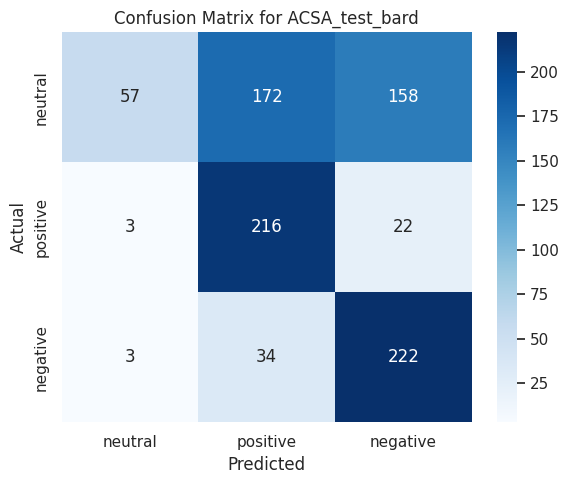

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [18]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  df.dropna(subset='sentiment_bard', inplace=True)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])
  counts = df['polarity'].str.count('neutral', flags=re.IGNORECASE).sum()
  print("Number of Neutral instances In Original ", counts)
  # Apply lowercase to 'Polarity' column
  df['Sentiment'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_bard'] = df['sentiment_bard'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
  df['sentiment_bard'] = df['sentiment_bard'].apply(convert_string_to_list)
  print(type(df['sentiment_bard'][0]))

  accuracy, actual_labels, predicted_labels= calculate_accuracy(df["Sentiment"], df["sentiment_bard"])
  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )


#Yaso Dataset

In [19]:
data = "YASO/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['TSA-MD_val_bard']

170
Null values are:  0 in  TSA-MD_val_bard
<class 'str'>
311.0
Accuracy: 0.9807073954983923 for TSA-MD_val_bard

Classification Report:
              precision    recall  f1-score   support

    negative       0.97      0.96      0.96        70
     neutral       0.00      0.00      0.00         0
    positive       0.99      0.99      0.99       241

    accuracy                           0.98       311
   macro avg       0.65      0.65      0.65       311
weighted avg       0.98      0.98      0.98       311



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_TSA-MD_val_bard.txt'
['neutral', 'positive', 'negative']


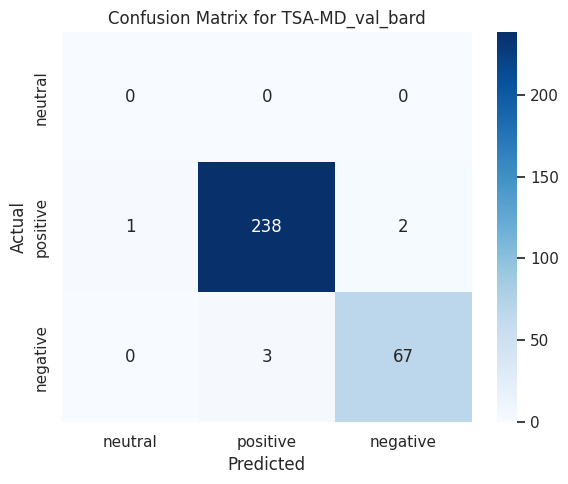

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [20]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  df=df[:][:170]
  print(len(df))
  df.dropna(subset=['sentiment_bard'], inplace=True)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['Sentiment'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_bard'] = df['sentiment_bard'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
  print(type(df['sentiment_bard'][0]))
  df['sentiment_bard'] = df['sentiment_bard'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy(df["Sentiment"], df["sentiment_bard"])
  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )


#SemEval 2016

In [21]:
data = "SemEval2016/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['restaurants_test_bard',
 'laptops_test_category_bard',
 'restaurants_test_category_bard']

Null values are:  0 in  restaurants_test_bard
<class 'str'>
600.0
Accuracy: 0.9383333333333334 for restaurants_test_bard

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.93      0.92       135
     neutral       1.00      0.10      0.19        29
    positive       0.95      1.00      0.97       435

    accuracy                           0.94       599
   macro avg       0.95      0.68      0.69       599
weighted avg       0.94      0.94      0.92       599

Classification report saved to 'classification_report_restaurants_test_bard.txt'
['neutral', 'positive', 'negative']


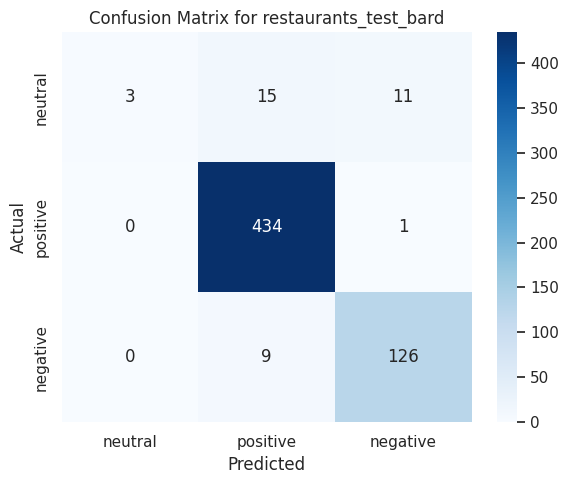

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  laptops_test_category_bard
<class 'str'>
804.0
Accuracy: 0.9104477611940298 for laptops_test_category_bard

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.94      0.93       275
     neutral       0.25      0.02      0.04        46
    positive       0.91      0.98      0.95       483

    accuracy                           0.91       804
   macro avg       0.69      0.65      0.64       804
weighted avg       0.88      0.91      0.89       804

Classification report saved to 'classification_report_laptops_test_category_bard.txt'
['neutral', 'positive', 'negative']


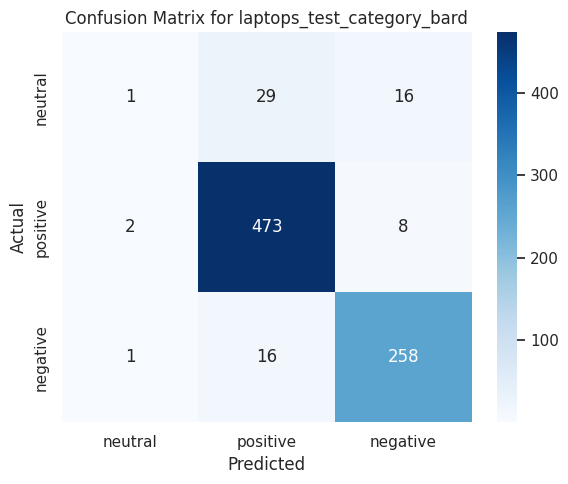

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


Null values are:  0 in  restaurants_test_category_bard
<class 'str'>
1718.0
Accuracy: 0.9266589057043073 for restaurants_test_category_bard

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.94      0.91       408
     neutral       0.71      0.06      0.11        88
    positive       0.95      0.99      0.97      1218

    accuracy                           0.93      1714
   macro avg       0.85      0.66      0.66      1714
weighted avg       0.92      0.93      0.91      1714

Classification report saved to 'classification_report_restaurants_test_category_bard.txt'
['neutral', 'positive', 'negative']


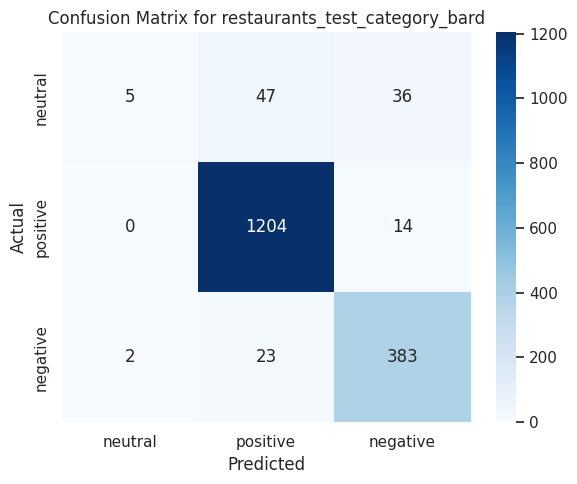

<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [22]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  df.dropna(subset=['sentiment_bard'], inplace=True)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['Sentiment'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_bard'] = df['sentiment_bard'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
  print(type(df['sentiment_bard'][0]))
  df['sentiment_bard'] = df['sentiment_bard'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy(df["Sentiment"], df["sentiment_bard"])
  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )


#Sentihood

In [23]:
data = "Sentihood/"
data_folder = root_folder+data
list_files= list_files_in_subfolders(data_folder)
filename = data_folder+list_files[0]
csv_file = filename+".csv"
list_files

['sentihood_test_bard_categories']

Null values are:  0 in  sentihood_test_bard_categories
<class 'str'>
1671.0
Accuracy: 0.9066427289048474 for sentihood_test_bard_categories

Classification Report:
              precision    recall  f1-score   support

                   0.00      0.00      0.00         0
    negative       0.87      0.80      0.83       455
     neutral       0.00      0.00      0.00         0
    positive       0.93      0.95      0.94      1216

    accuracy                           0.91      1671
   macro avg       0.45      0.44      0.44      1671
weighted avg       0.91      0.91      0.91      1671



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report saved to 'classification_report_sentihood_test_bard_categories.txt'
['', 'neutral', 'positive', 'negative']


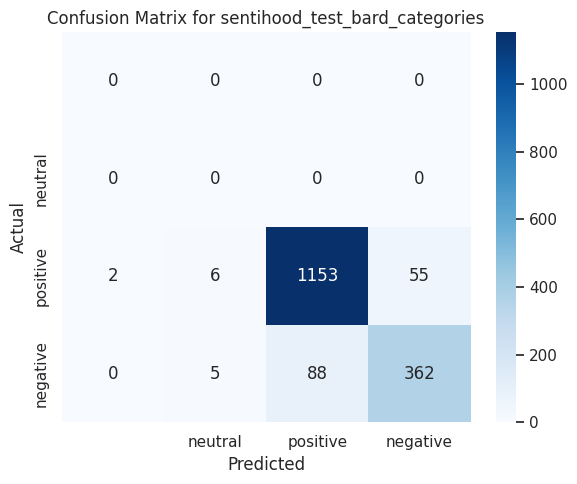

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-11-a939bb3609db>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_to_append, ignore_index=True)


In [24]:
for i in range(len(list_files)):
  filename = data_folder+list_files[i]
  csv_file = filename+".csv"
  df = pd.read_csv(csv_file)
  df.dropna(subset=['sentiment_bard'], inplace=True)
  # Check for null values in any column of each row
  rows_with_null = df[df.isnull().any(axis=1)]
  print("Null values are: ", len(rows_with_null), "in ", list_files[i])

  # Apply lowercase to 'Polarity' column
  df['Sentiment'] = df['polarity'].apply(lambda x: x.lower() if isinstance(x, str) else x)
  df['sentiment_bard'] = df['sentiment_bard'].apply(lambda x: x.lower() if isinstance(x, str) else x)

  # Apply string conversion to 'Polarity' column
  df['Sentiment'] = df['Sentiment'].apply(convert_string_to_list)
  print(type(df['sentiment_bard'][0]))
  df['sentiment_bard'] = df['sentiment_bard'].apply(convert_string_to_list)

  accuracy, actual_labels, predicted_labels= calculate_accuracy(df["Sentiment"], df["sentiment_bard"])
  print(f"Accuracy: {accuracy} for {list_files[i]}")
  save_report(actual_labels, predicted_labels, filename, list_files[i])
  plot_confusion_matrix(actual_labels, predicted_labels, filename, list_files[i])
  save_results(actual_labels, predicted_labels, root_folder, data=data, title=list_files[i], test_acc=accuracy )


In [25]:
df = pd.read_csv(csv_file)
df.dropna(subset='sentiment_bard', inplace=True)
df['Sentiment_'] = df['sentiment_bard'].apply(convert_string_to_list)

In [26]:
print(len(predicted_labels))

1671
